![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from anytree import Node
from anytree.exporter import DotExporter

In [2]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [3]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  total       10886 non-null  int64  
 11  hour        10886 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.1 MB


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean().sort_values()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean().sort_values()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

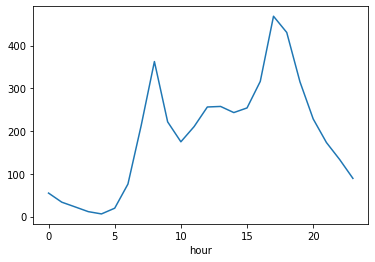

In [6]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:title={'center':'Número promedio de bicicletas rentadas por hora en invierno'}, xlabel='hour'>

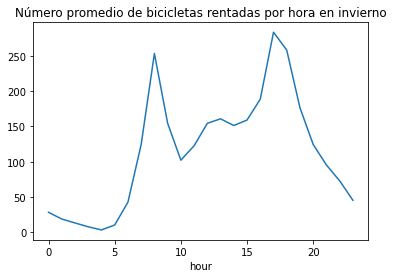

In [18]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes[bikes['season'] == 1].groupby('hour').total.mean().plot(title='Número promedio de bicicletas rentadas por hora en invierno')

<AxesSubplot:title={'center':'Número promedio de bicicletas rentadas por hora en verano'}, xlabel='hour'>

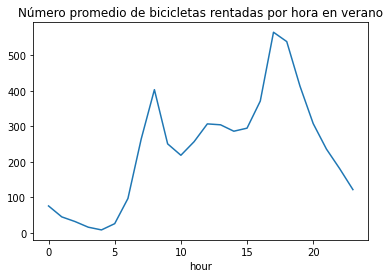

In [19]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes['season'] == 3].groupby('hour').total.mean().plot(title='Número promedio de bicicletas rentadas por hora en verano')

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [5]:
# Celda 3

# Considerando que season es un variable categórica se crean variables dummy para ésta
X = bikes[['hour', 'season']]
y = bikes['total']

# Crear una transformación de columna para aplicar el one-hot encoding a "season"
preprocessor = ColumnTransformer(
    transformers=[
        ('season', OneHotEncoder(drop='first'), ['season'])
    ],
    remainder='passthrough'
)

# Crear un pipeline que primero aplique la transformación de columna y luego ajuste la regresión lineal
regression_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Ajustar el pipeline al conjunto de datos
regression_pipeline.fit(X, y)

# Obtener los coeficientes de la regresión lineal
intercept = regression_pipeline.named_steps['regressor'].intercept_
coefficients = regression_pipeline.named_steps['regressor'].coef_

# Imprimir los coeficientes
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: -6.430262462305876
Coefficients: [100.31723192 119.46754995  84.08311787  10.54520609]


In [8]:
# Evaluar el desempeño del modelo de regresión lineal
y_pred = regression_pipeline.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

MSE: 25480.69
RMSE: 159.63
R²: 0.22


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [71]:
# Celda 4

# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10, min_samples_leaf=1):
    
    # Si solo es una observación
    if X.shape[0] <= min_samples_leaf:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'
def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

# Definición de modelo
model_tree = tree_grow(X, y, level=0, min_gain=0.001, num_pct=12, max_depth=4, min_samples_leaf=6)


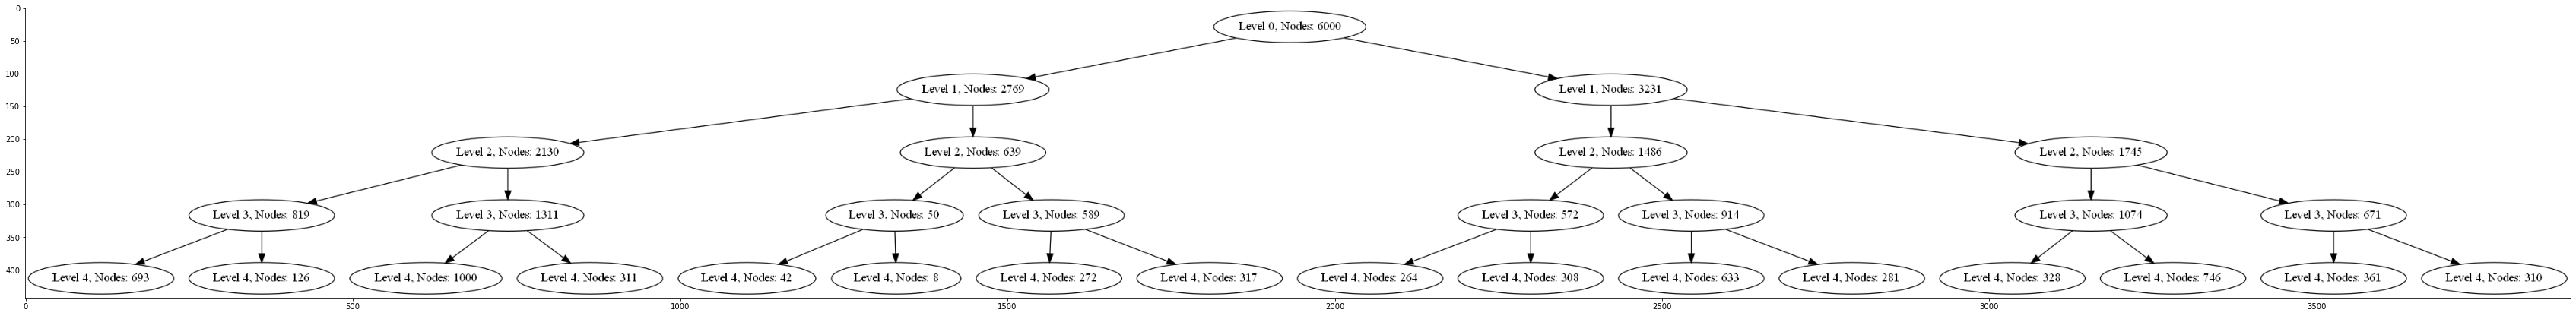

In [73]:
def build_tree(tree_dict, parent=None):
    node = Node(f"Level {tree_dict['level']}, Nodes: {tree_dict['n_samples']}", parent=parent)
    if tree_dict.get('sl'):
        build_tree(tree_dict['sl'], parent=node)
    if tree_dict.get('sr'):
        build_tree(tree_dict['sr'], parent=node)
    return node

tree_visual = build_tree(model_tree)
DotExporter(tree_visual).to_picture('tree.png')
img = mpimg.imread('tree.png')
plt.subplots(figsize=(60, 50))
plt.imshow(img)
plt.show()

In [75]:
def count_leaves(tree):
    if 'sl' not in tree and 'sr' not in tree:
        return 1
    else:
        left_count = count_leaves(tree['sl']) if 'sl' in tree else 0
        right_count = count_leaves(tree['sr']) if 'sr' in tree else 0
        return left_count + right_count
    
count_leaves(model_tree)


16

`Para un árbol de 4 niveles nos genera un 16 nodos tipo hoja`

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

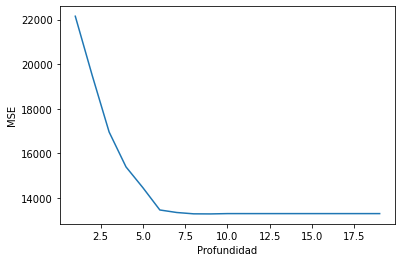

In [9]:
# Celda 5
mse_list = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Se evalua la mejor profundidad para el modelo
for depth in range(1, 20):
    model = DecisionTreeRegressor(max_depth=depth, random_state=1)
    model.fit(X_train, y_train)
    mse_list.append(mean_squared_error(y_test, model.predict(X_test)))

plt.plot(range(1, 20), mse_list)
plt.xlabel('Profundidad')
plt.ylabel('MSE')
plt.show()

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [10]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [11]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [12]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [42]:
# Celda 6
def get_metrics(model, name):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  return { 'Model': name, 'Accuracy': accuracy, 'F1-Score': f1 }


results = []
model_dt_max_depth = DecisionTreeClassifier(max_depth=4, random_state=40)
model_dtmin_samples_leaf = DecisionTreeClassifier(min_samples_leaf=80, random_state=40)
model_lr = LogisticRegression()

results.append(get_metrics(model_dt_max_depth, 'Árbol de decisión max_depth=4'))
results.append(get_metrics(model_dtmin_samples_leaf, 'Árbol de decisión min_samples_leaf=100'))
results.append(get_metrics(model_lr, 'Regresión Logística'))

pd.DataFrame(results)

,Model,Accuracy,F1-Score
0,Árbol de decisión max_depth=4,0.651333,0.634521
1,Árbol de decisión min_samples_leaf=100,0.641333,0.643236
2,Regresión Logística,0.614000,0.610625


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [43]:
# Celda 7
# 100 árboles de decisión donde max_depth tome un valor de su elección
model_bag_dt_max_depth = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4, random_state=40), n_estimators=100,
                                          max_samples=300, bootstrap=True, random_state=40, n_jobs=-1, oob_score=True)

# 100 árboles de decisión donde min_samples_leaf tome un valor de su elección
model_bag_dt_min_samples = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=80, random_state=40), n_estimators=100,
                                            max_samples=300, bootstrap=True, random_state=40, n_jobs=-1, oob_score=True)

# 100 regresiones logísticas
model_bag_lr = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                                max_samples=300, bootstrap=True, random_state=40, n_jobs=-1, oob_score=True)

results = []
results.append(get_metrics(model_bag_dt_max_depth, 'Árbol de decisión con max_depth = 4'))
results.append(get_metrics(model_bag_dt_min_samples, 'Árbol de decisión con min_samples_leaf = 100'))
results.append(get_metrics(model_bag_lr, 'Regresión Logística'))

model_metrics = pd.DataFrame(results)
model_metrics

,Model,Accuracy,F1-Score
0,Árbol de decisión con max_depth = 4,0.662000,0.663570
1,Árbol de decisión con min_samples_leaf = 100,0.651333,0.646860
2,Regresión Logística,0.620000,0.612245


In [17]:
# Evaluación de ensamblaje con votación mayoritaria
voting_clf = VotingClassifier(
    estimators=[
        ('model_bag_dt_max_depth', model_bag_dt_max_depth),
        ('model_bag_dt_min_samples', model_bag_dt_min_samples),
        ('model_bag_lr', model_bag_lr)
    ],
    voting='hard'
)

pd.DataFrame([get_metrics(voting_clf, 'Ensamblaje con votación mayoritaria')])

,Model,Accuracy,F1-Score
0,Ensamblaje con votación mayoritaria,0.659333,0.659106


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [23]:
# Celda 8
# Ponderación usando Accuracy
voting_clf_accuracy = VotingClassifier(
    estimators=[
        ('model_bag_dt_max_depth', model_bag_dt_max_depth),
        ('model_bag_dt_min_samples', model_bag_dt_min_samples),
        ('model_bag_lr', model_bag_lr)
    ],
    voting='soft',
    weights=model_metrics['Accuracy']
)


results = []
results.append(get_metrics(voting_clf_accuracy, 'Ensamblaje con votación ponderada'))
pd.DataFrame(results)

,Model,Accuracy,F1-Score
0,Ensamblaje con votación ponderada,0.657333,0.660502


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
# Celda 9